## Plotting categorical data

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Importing the dataset in dataframe format
wine_data = pd.read_csv('datasets/winequality-white.csv', 
                        names=["Fixed Acidity", "Volatile Acidity", "Citric Acid", "Residual Sugar",
                                "Chlorides", "Free Sulfur Dioxide", "Total Sulfur Dioxide", "Density", 
                                "pH", "Sulphates", "Alcohol", "Quality"],
                        skiprows=1,
                        sep=r'\s*;\s*', engine='python')


In [3]:
#setting style for seaborn for better viewability
sns.set(style="whitegrid", color_codes=True)

#set up for statistical analysis
np.random.seed(sum(map(ord, "categorical")))

**While dealing with linear relationships, we plotted the relationship between alcohol content and quality of the wine samples. We noted that since the Quality values had discrete numbers, our graph had samples spread vertically along discrete intervals. We tried to analyse the plot by adding some jitter, and adopting the central tendency approach. But it still did not provide too many details about the distribution under study.**

Such plots, where one of the variables of interest is categorical, are best approached by methods specific to categorical plots. Seaborn provides many functions to anayse such data:
* swarmplot() and stripplot() for plots that show each observation at each level of the categorical variable
* boxplot() and violinplot() for abstract representations of each distribution of observations
* barplot() and pointplot() for those that apply statistical estimation to show a measure of central tendency and confidence interval.
* factorplot(), that takes the help of FacetGrid and allows the user to plot across a grid of figure panels, unlike the rest that plot onto a specific matplotlib axis

#### Let's consider the same Quality-Alcohol content example.

<AxesSubplot:xlabel='Quality', ylabel='Alcohol'>

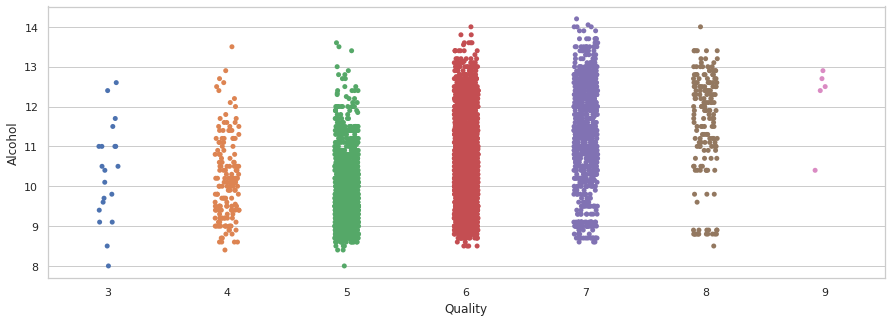

In [4]:
f,ax=plt.subplots(figsize=(15,5))

sns.stripplot(x='Quality', y='Alcohol', data=wine_data)

*We see that stripplot is basically a scatterplot to the case where one variable is categorical. It is clear that points overlap though.* <br>
Let us try to adjust the data points along the categorical axis.

<AxesSubplot:xlabel='Quality', ylabel='Alcohol'>

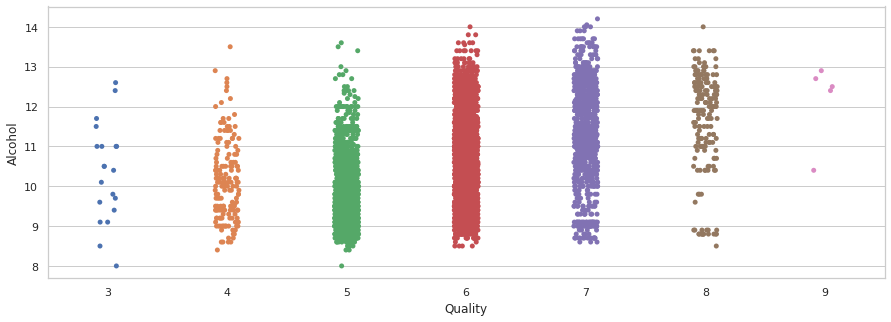

In [5]:
f,ax=plt.subplots(figsize=(15,5))

sns.stripplot(x='Quality', y='Alcohol', data=wine_data, jitter=True)

The other way to do this is invoke the swarmplot().


/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 74.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 78.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 44.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Quality', ylabel='Alcohol'>

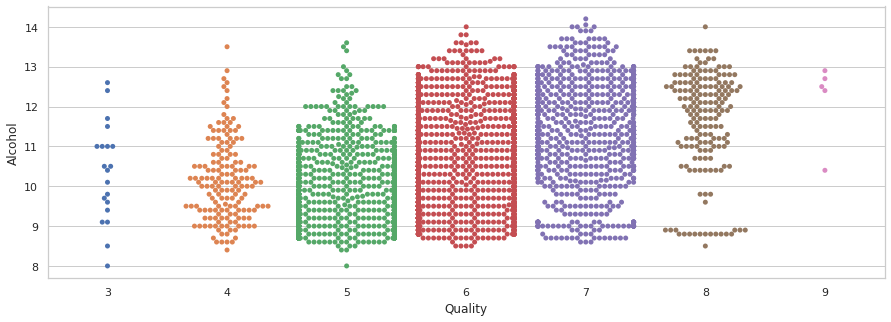

In [6]:
f,ax=plt.subplots(figsize=(15,5))

sns.swarmplot(x='Quality', y='Alcohol', data=wine_data)

*The swarm plot output is spread out such that overlap is minimum. This is clear when comparing the stripplot with jitter and the swarm plot; the number of points seen is way more in the swarmplot, and is a true measure of the number of samples being considered. The algorithm behind swarm plot is built to function this way.*

Two things are can be understood:
* Colours in the above plot are random
* In a categorical distribution, the categorical values are arranged in ascending order along the axis. If the data is in string format, the values appear in the order specified in the dataframe. 
  * If working with pandas, one could set a default order of categoried from there before importing.
    

From the above plots, it is clear that from the wine samples, there are many with different quantities of alcohol, but they all fall into a set of categories when it comes to quality. The thick lines in the first stripplot show the sheer number of wine samples that are of quality rating 6 and 7. The same point is validated by spreading out the points and observing the amount of points available. 

If a party member randomly picked a glass from the wine samples, the probability of it being one of quality between 5 and 8 is highest.


### Could we use the hue plot to add some additional details in the plot, like in previous graphs?

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 74.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 78.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 44.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Quality', ylabel='Alcohol'>

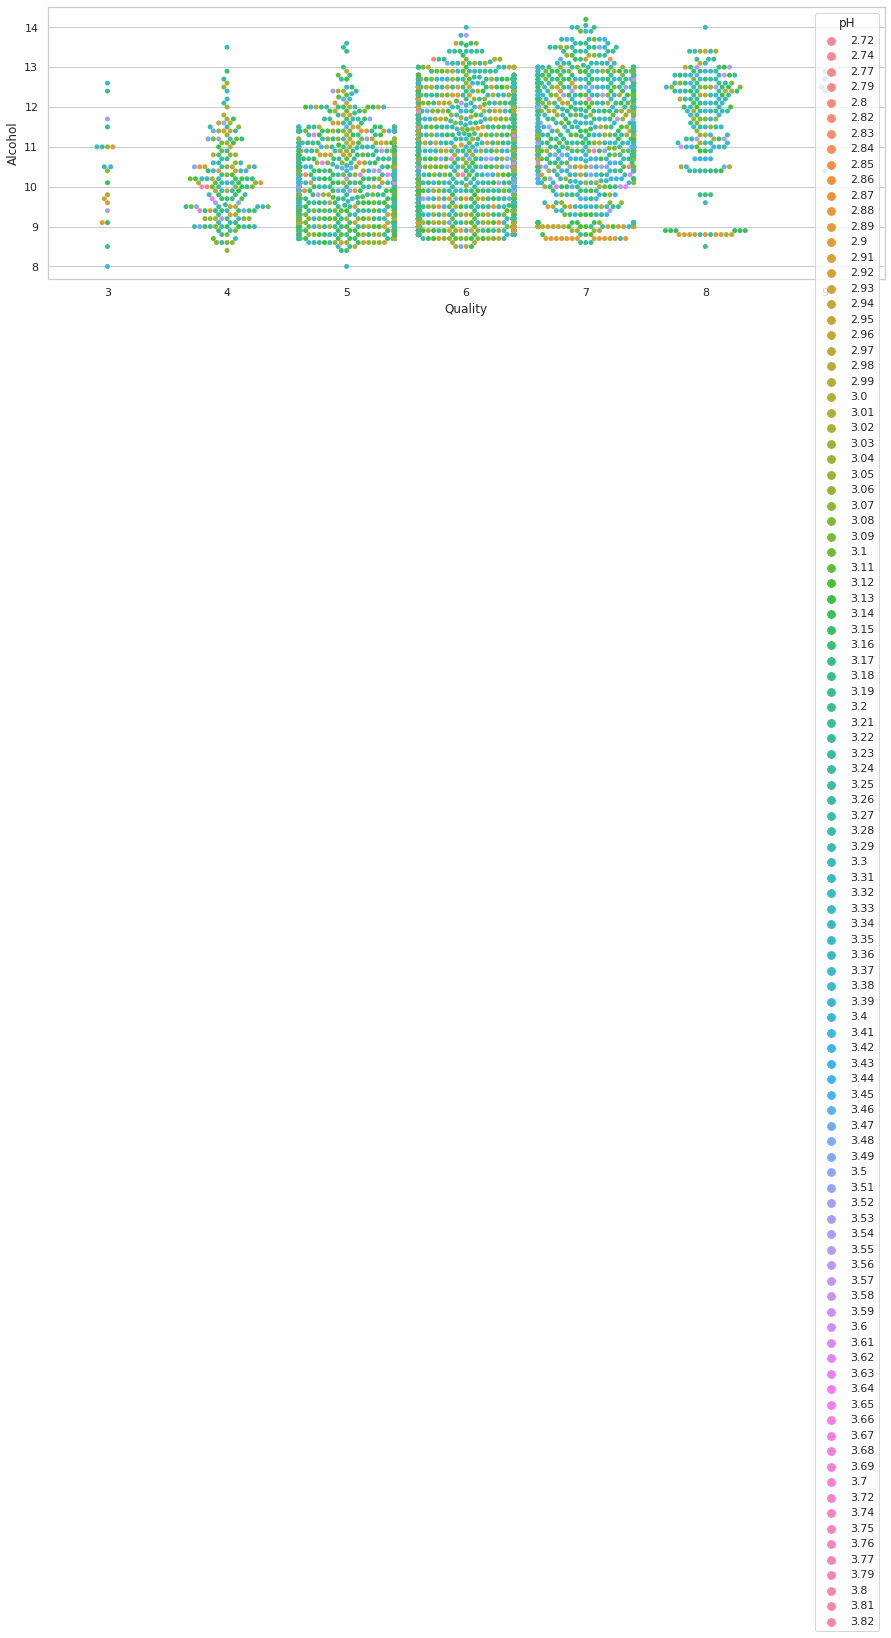

In [7]:
f,ax=plt.subplots(figsize=(15,5))

sns.swarmplot(x='Quality', y='Alcohol', data=wine_data, hue="pH")

*We have basically added a nested categorical variable* <br>
It is evident that most samples are in the pH range of 3plus. <br>
We can also see that few samples range from a pH of 2.7 to about 3.82 also.

### Can we plot the graph horizontally instead?

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 55.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 82.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 94.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 95.3% of the points cannot be placed; y

<AxesSubplot:xlabel='Alcohol', ylabel='Quality'>

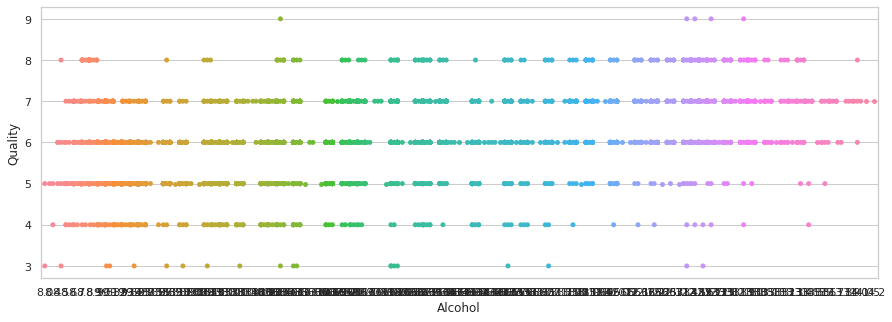

In [8]:
f, ax = plt.subplots(figsize=(15,5))

#The axes have been interchanged
sns.swarmplot(y='Quality', x='Alcohol', data=wine_data)

## How do we get more information about the distribution values within each category?
Some of your guests are specific about wine quality. How do you know how many samples of each quality you have? Will it be sufficient for everyone present? Let's try different plots to see what helps us get an idea about each category of wine.


#### The Box Plot

<AxesSubplot:xlabel='Quality', ylabel='Alcohol'>

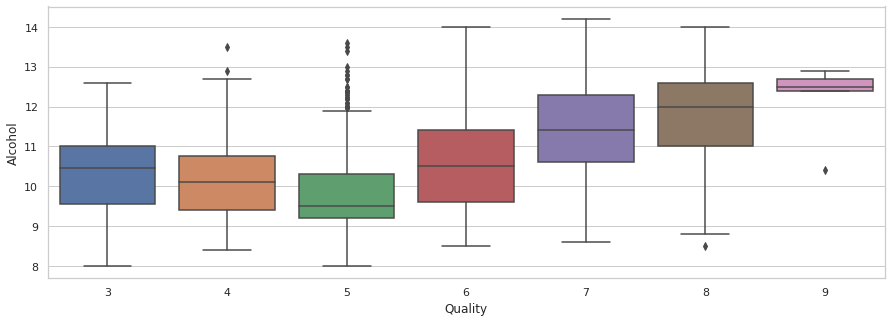

In [9]:
#setting the size for the plot
f,ax=plt.subplots(figsize=(15,5))

sns.boxplot(x='Quality', y='Alcohol', data=wine_data)

By comparing this graph with the initial stripplot, we can observe the following:
* The boxes are placed where the number of wine samples with alcohol concentration is highest - Ideally, this correcponds to three quartile of the values in the distribution
* There are lines extending on either side of the box plot on either side. Along categories where some data exist that are a little off from the max concentration, some data points are visible.
In boxplot terms, the whiskers extend to points that lie within 1.5 times the interquartile range of the lower and upper quartile. Observations falling outside this margin are displayed independently.

#### The Violin Plot

<AxesSubplot:xlabel='Quality', ylabel='Alcohol'>

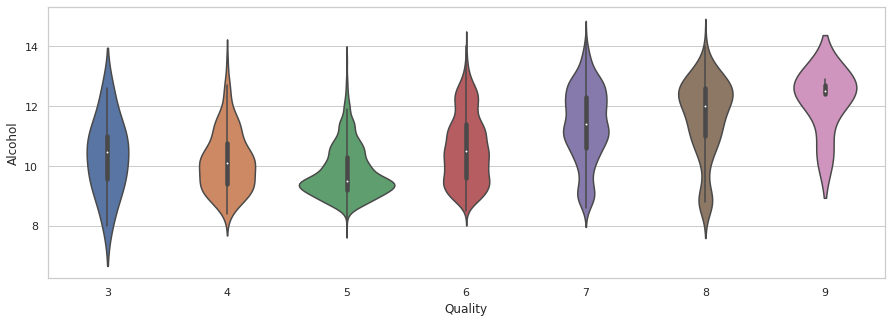

In [10]:
#setting the size for the plot
f,ax=plt.subplots(figsize=(15,5))

sns.violinplot(x='Quality', y='Alcohol', data=wine_data)

* The name comes from the shape of the graph plotted. We see that this is similar to the box plot, except that the shaded region is enclosed between curves. 
* The representation provides a better description of the values of the distribution.
* Linking this to what we observed while analysing univariate distributions, we see that these curve boundaries correspond to the kernel density estimate
* The quartile and whisker values are part of the violin itself.

Adding a few parameters to tweak the KDE curve,

<AxesSubplot:xlabel='Quality', ylabel='Alcohol'>

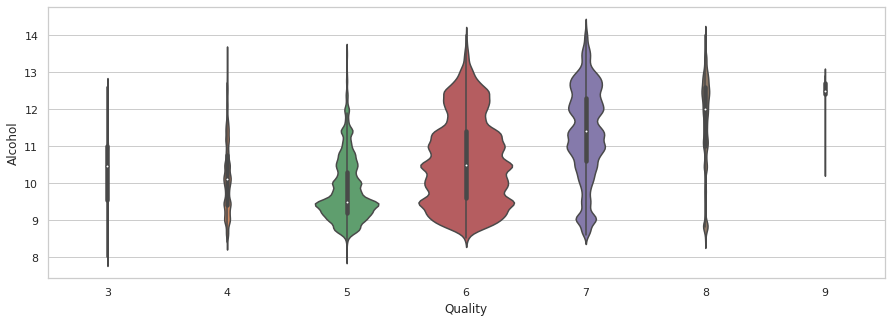

In [11]:
f,ax=plt.subplots(figsize=(15,5))

sns.violinplot(x='Quality', y='Alcohol', data=wine_data,
               bw=.1, scale="count")

*Setting the scale as count scales the width of the violins to the number of observations in that bin.*
This is in line with our observations so far. There are more wine samples that are of quality 6.

#### Adding individual observations inside the violin plots

<AxesSubplot:xlabel='Quality', ylabel='Alcohol'>

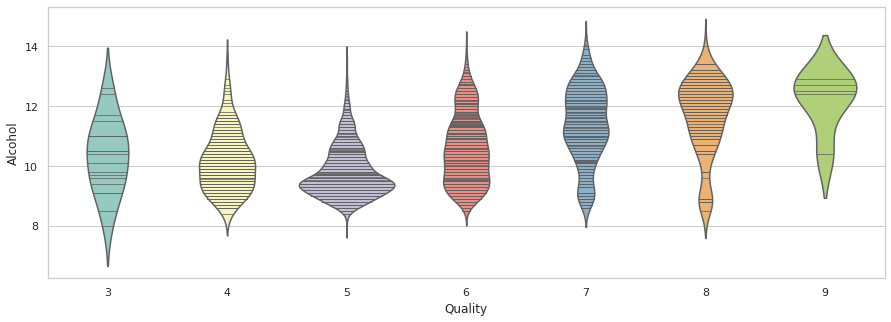

In [12]:
f,ax=plt.subplots(figsize=(15,5))

sns.violinplot(x='Quality', y='Alcohol', data=wine_data, inner="stick", palette="Set3")

 * There are more wine samples of quality 6, which can be seen comparing areas of the violin plots.
 * More wine samples with same alcohol content have a quality of 5, while the variation of alcohol levels of quality 6 is high.

*Note: If the hue parameter has just two levels, the violinplot provides a split keyword that vertically divides the violin into two halves and displays data corresponding to the hues on either side.

### Combining plots

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 76.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 79.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 50.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Quality', ylabel='Alcohol'>

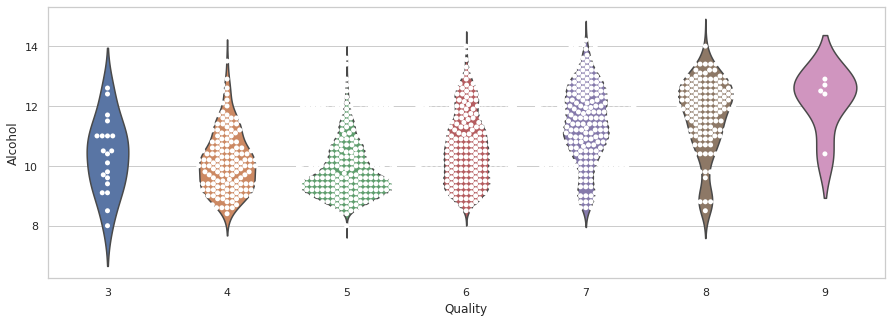

In [13]:
#setting the size for the plot
f,ax=plt.subplots(figsize=(15,5))

#A combination of different plots on the same graph sometimes provides more information than individually 
#analysing different plots.

sns.violinplot(x='Quality', y='Alcohol', data=wine_data, inner=None)
sns.swarmplot(x='Quality', y='Alcohol', data=wine_data, color='w')

The observations we made are clearer still in the above plot, with the swarm plot's points depicted in the violin plot area.

### Statistical estimation within categories
**Plots to show the central tendency of the values in the distribution**

Let us perform some complex analysis. We seriously get down to business trying to satisfy everyone with respect to the required quality and alcohol content. <br>
How do we find this relation along with the acidity of the wines?

<AxesSubplot:xlabel='Quality', ylabel='pH'>

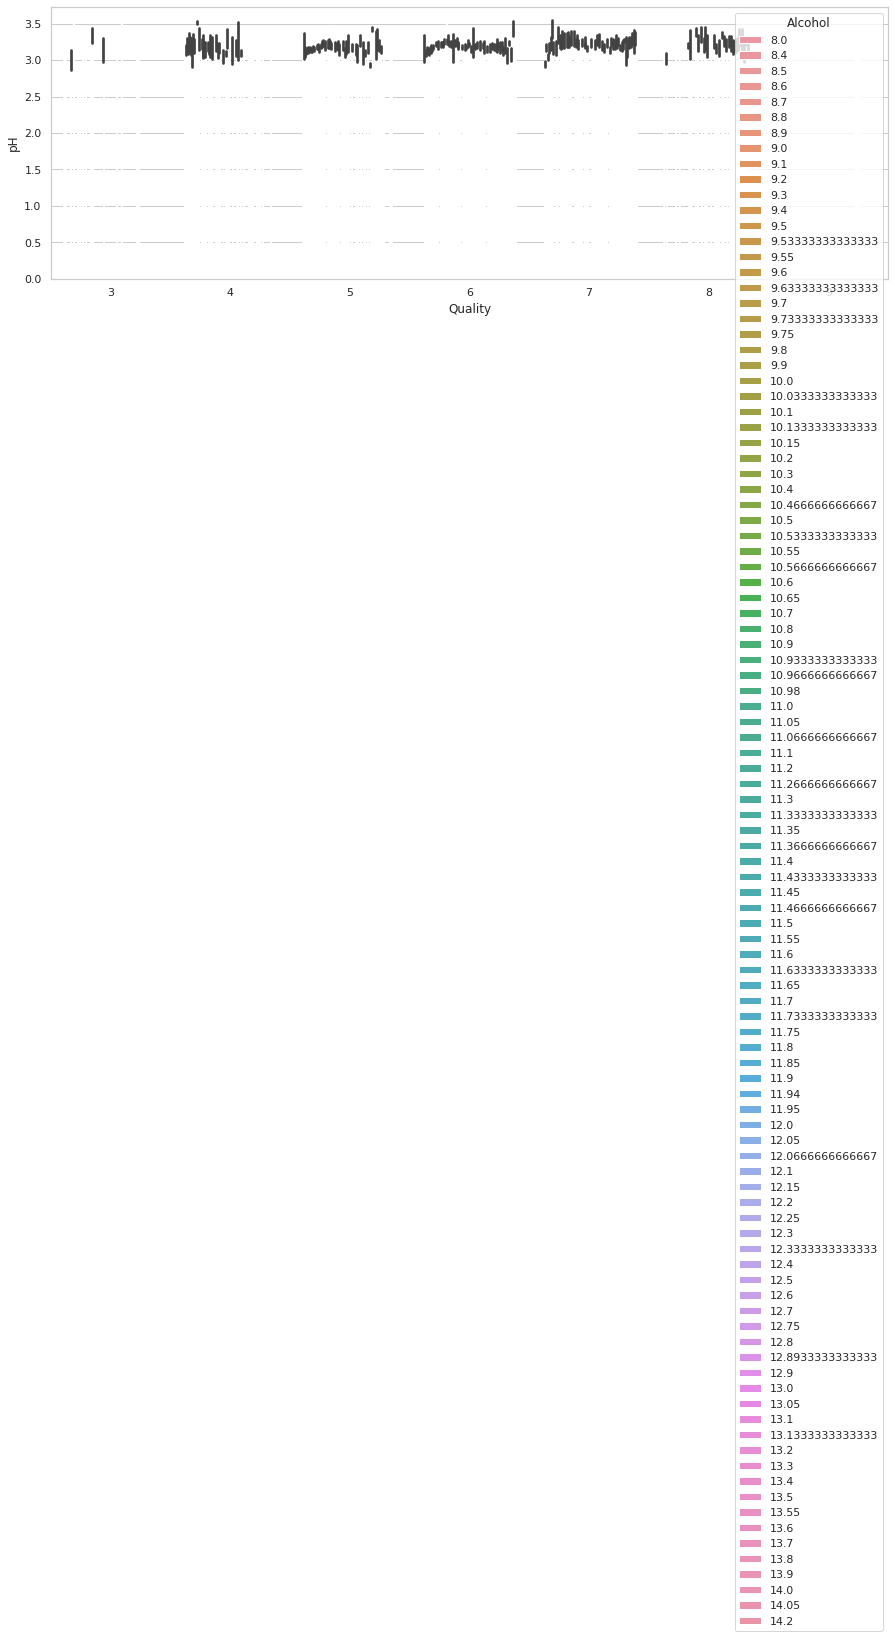

In [14]:
f,ax=plt.subplots(figsize=(15,5))

sns.barplot(x='Quality', y='pH', data=wine_data, hue="Alcohol")

We see a bar plot that has taken into account the alcohol content, quality and fixed acidity of every wine sample under consideration.
For every quality of wine, we see a set of bar plots that correspond to different acidity levels, all drawn with height represented by pH levels. 
Judging by the colours we see in our plot, we have a good mix of wine samples with alcohol content ranging between 8 and 14, with more in the quality range of 4 to 8. We are in safe hands as this satisfies the requirement of our party members.

#### To show the number of variables in each category - countplot()

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102]),
 [Text(0, 0, '8.0'),
  Text(1, 0, '8.4'),
  Text(2, 0, '8.5'),
  Text(3, 0, '8.6'),
  Text(4, 0, '8.7'),
  Text(5, 0, '8.8'),
  Text(6, 0, '8.9'),
  Text(7, 0, '9.0'),
  Text(8, 0, '9.1'),
  Text(9, 0, '9.2'),
  Text(10, 0, '9.3'),
  Text(11, 0, '9.4'),
  Text(12, 0, '9.5'),
  Text(13, 0, '9.53333333333333'),
  Text(14, 0, '9.55'),
  Text(15, 0, '9.6'),
  Text(16, 0, '9.63333333333333'),
  Text(17, 0, '9.7'),
  Text

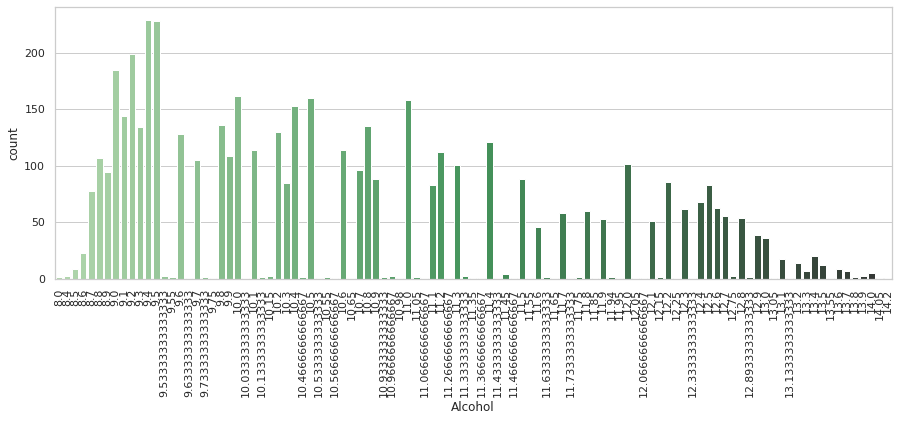

In [15]:
f,ax=plt.subplots(figsize=(15,5))

sns.countplot(x='Alcohol', data=wine_data, palette="Greens_d")

plt.xticks(rotation=90) 

<AxesSubplot:xlabel='Quality', ylabel='pH'>

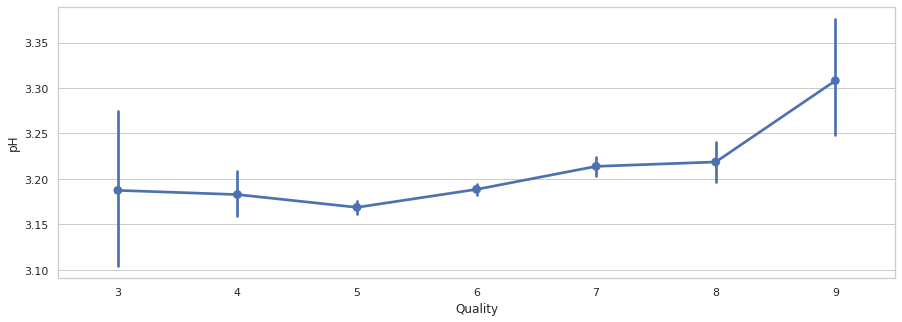

In [16]:
f,ax=plt.subplots(figsize=(15,5))

sns.pointplot(x='Quality', y='pH', data=wine_data)

We see that the plot is a set of point estimates and confidence intervals. It is clear the variation of pH in wine samples of quality 3 is very large when compared to quality 6. Introducing another dimension to it via the hue parameter, we get the below:

<AxesSubplot:xlabel='Quality', ylabel='pH'>

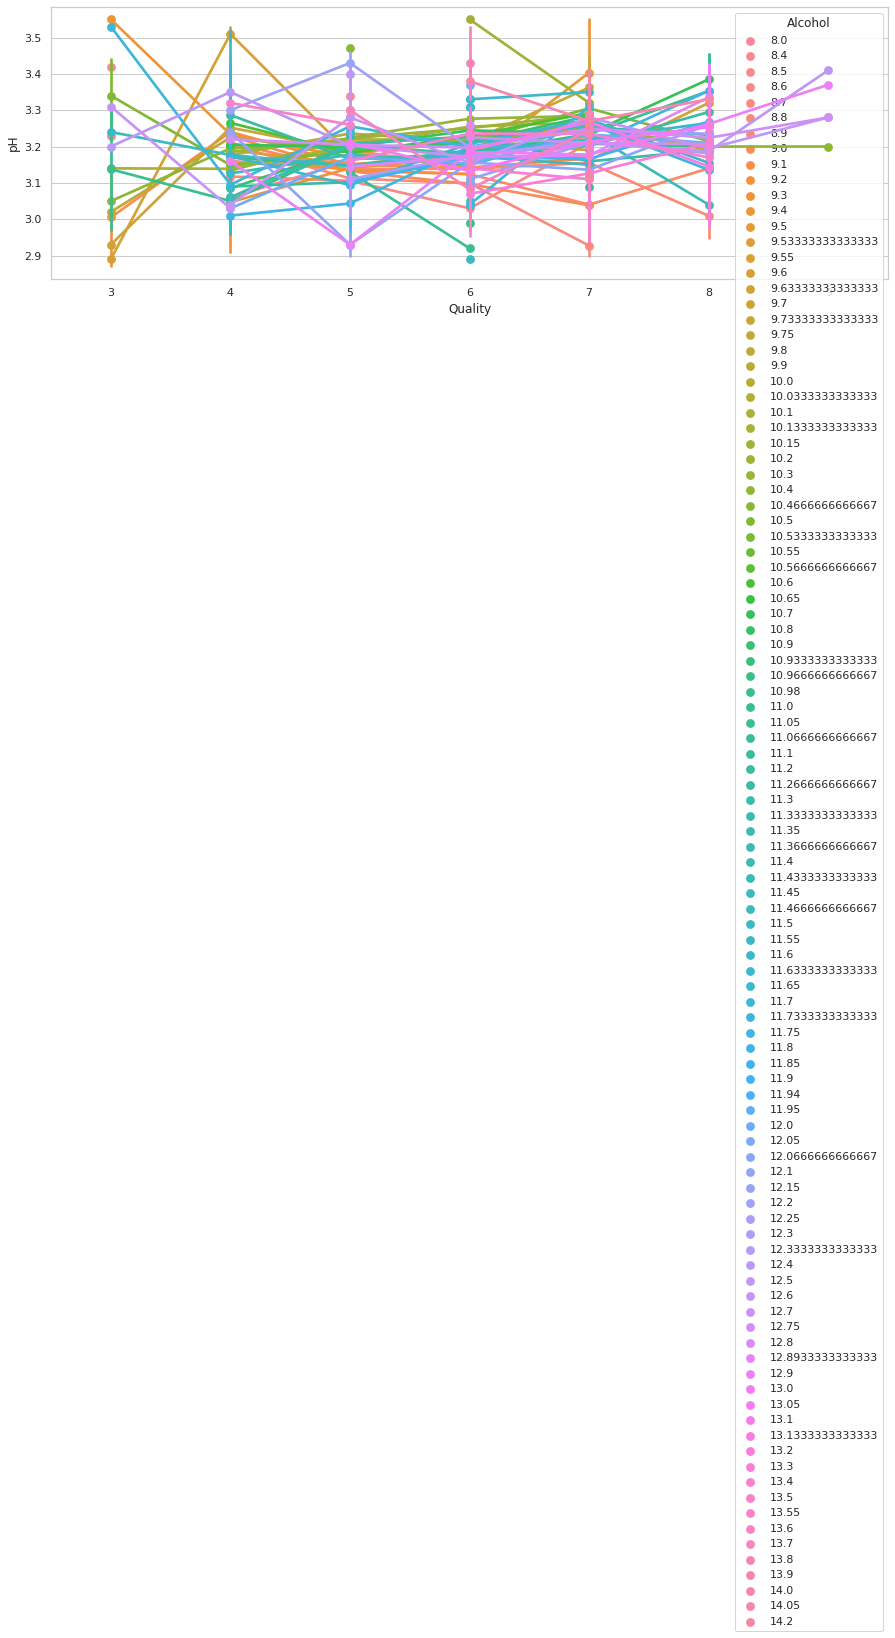

In [17]:
f,ax=plt.subplots(figsize=(15,5))

sns.pointplot(x='Quality', y='pH', data=wine_data, hue="Alcohol")

*Although the above graph is too complicated to understand, we notice that pointplot connects points from the same hue category. This feature can be used to study how the main relationship is changing as a function of a second variable.*

#### Plotting wide-form data

In the wide format, a subject's repeated responses will be in a single row, and each response is a separate column. Tidy or Long format has every row following one time point per subject principle. Each subject will have multiple rows, where entries can be repeated.

The wide-form data can be in a variety of formats, including pandas DataFrames or two-dimensional numpy arrays.

*Passing in the complete dataframe to the data object,*

<AxesSubplot:>

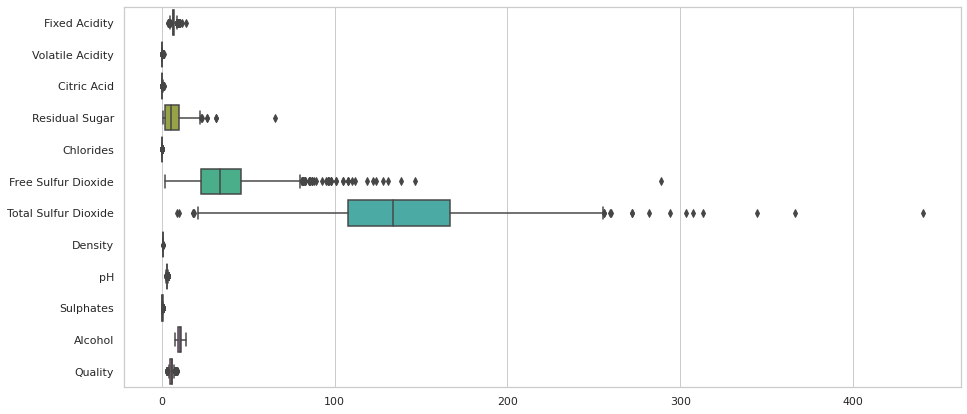

In [18]:
f,ax=plt.subplots(figsize=(15,7))


sns.boxplot(data=wine_data, orient="h")

## Drawing multi-panel categorical plots

Multi-panel data involves multi-dimensional data that is varying with time.

Just like how we combined regression plots with bivariate distribution analyses, we now try the factorplot() which combines the functions used so far along with FacetGrid, adding the ability to examine additional categories through the larger structure of the figure

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


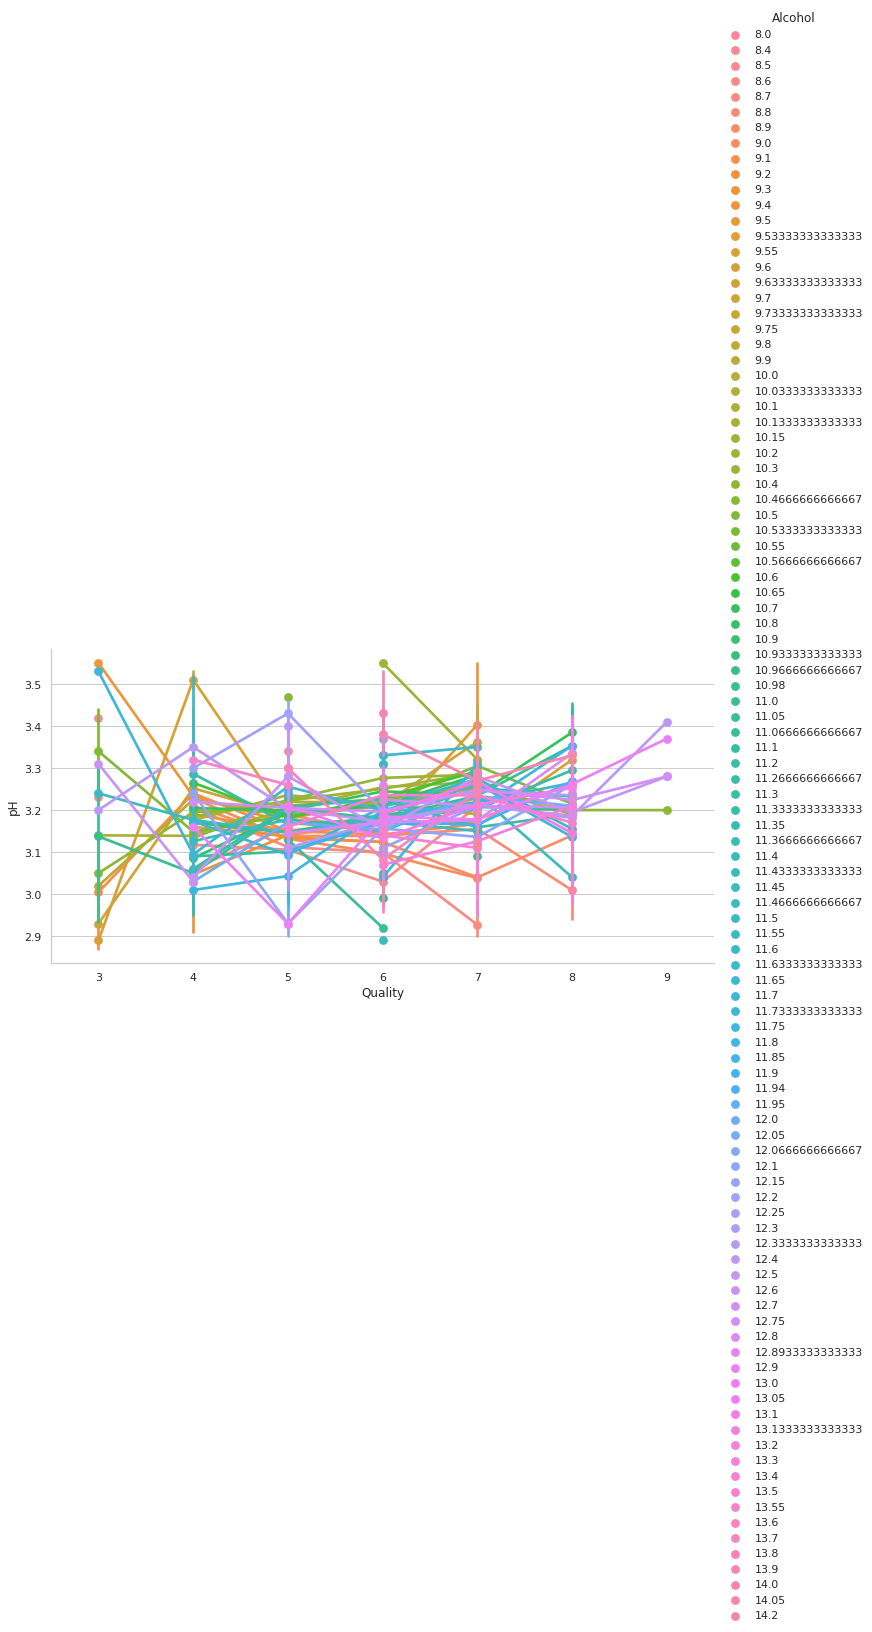

In [19]:
sns.factorplot(x='Quality', y='pH', data=wine_data, hue="Alcohol", size=5, aspect=2)

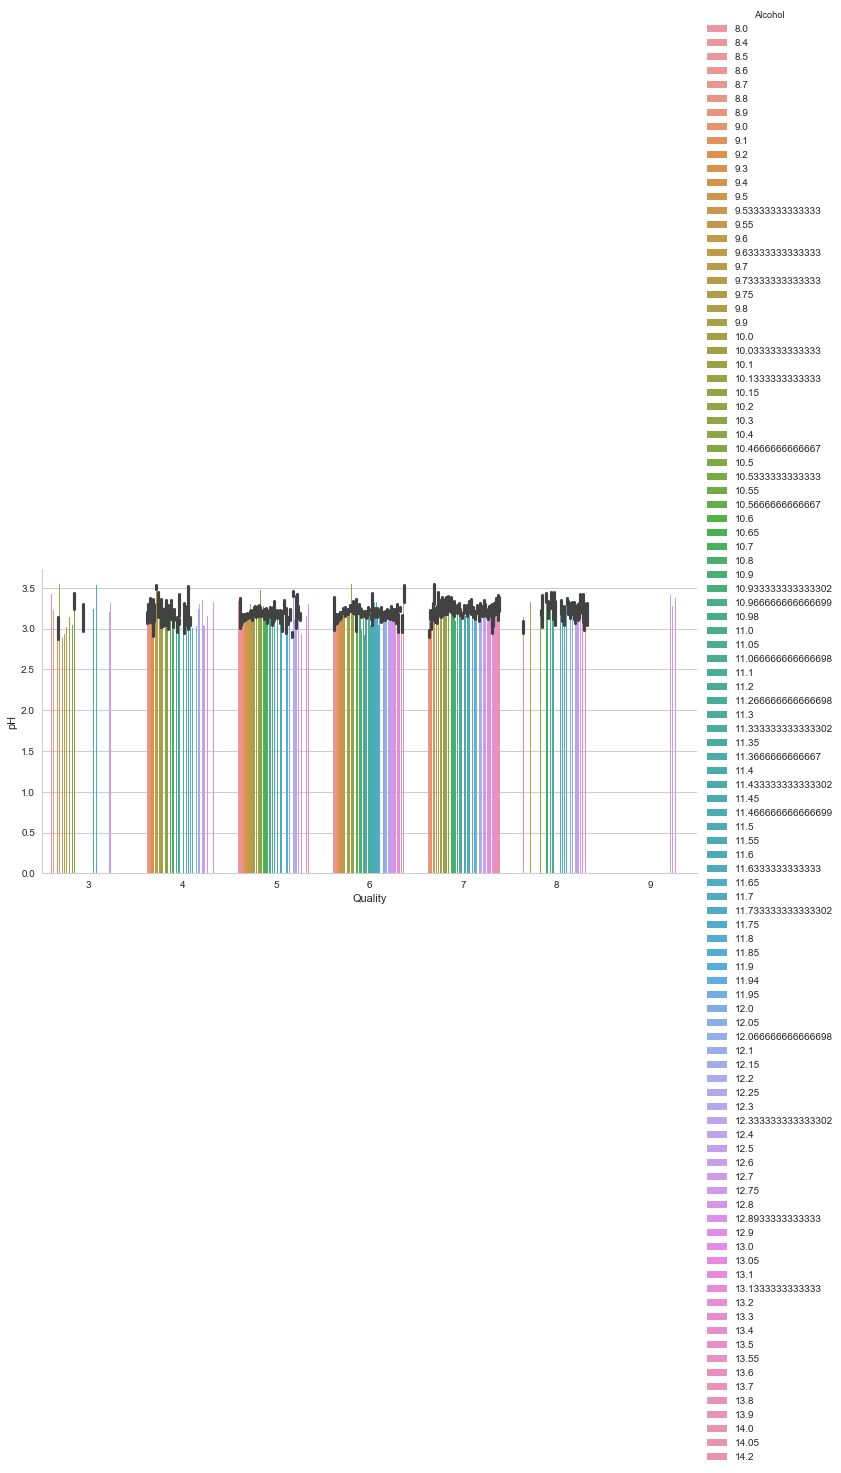

In [18]:
sns.factorplot(x='Quality', y='pH', data=wine_data, hue="Alcohol", size=5, aspect=2,
               kind="bar")

The above plots are exactly the same as the bar and point plots we created earlier with an added hue parameter.

### Let us now try to expoit the factor plot to see if we can generate some interesting patterns

We use the factorplot to split the plot based on categorical variables, and use this to study relationships. We get a configurable matrix of plots, where we have flexibility with the axis parameters and the way we visualise other dimensions to the plot.

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


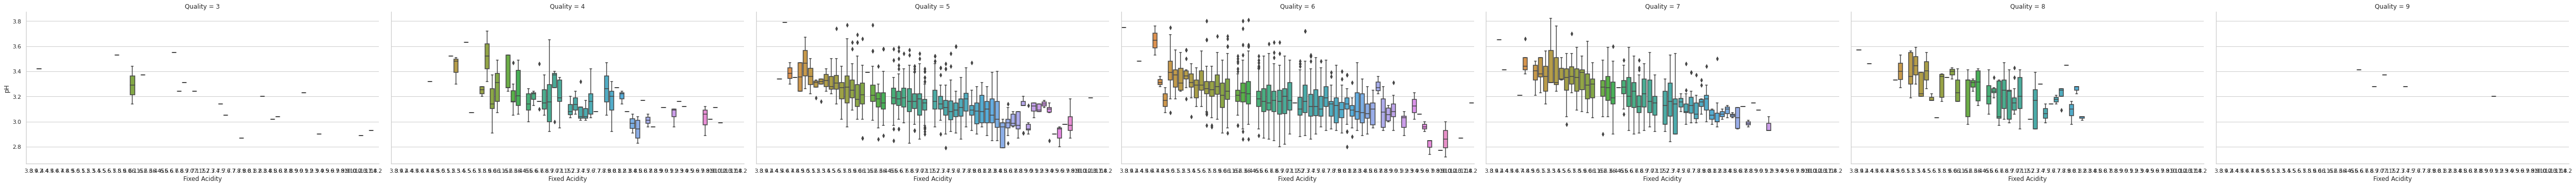

In [20]:
sns.factorplot(x='Fixed Acidity', y='pH', data=wine_data, size=5, aspect=2,
               col="Quality",kind="box")

We have a set of graphs showing the relationship between Fixed Acidity and pH in our wine samples. The factorplot has generated one for each quality value. 

Let us generate the same with swarm plots

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-package

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 28.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 35.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; y

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 42.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; y

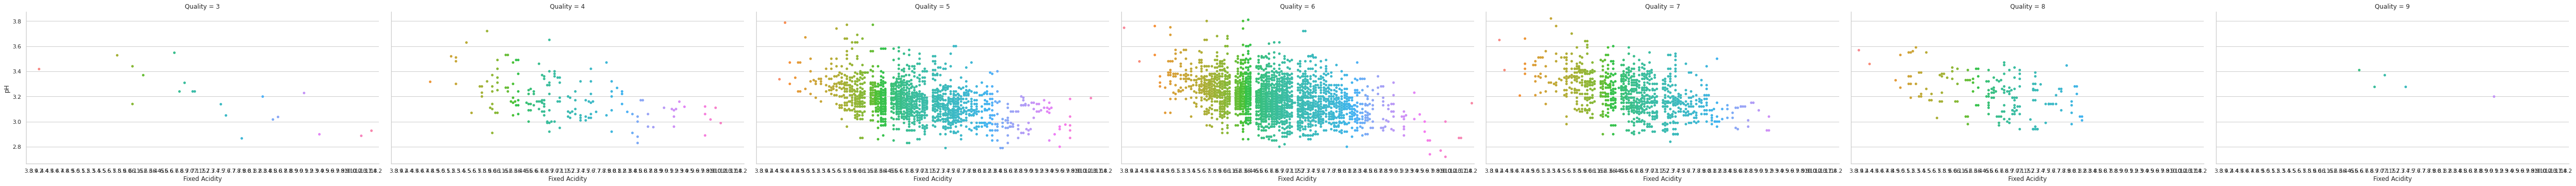

In [21]:
sns.factorplot(x='Fixed Acidity', y='pH', data=wine_data, size=5, aspect=2,
               col="Quality",kind="swarm")